## Observations and Insights

After reviewing the data following observations can be made:
1. Two drug regimens had the highest number of data points: "Capomulin" and "Ramicane". It maybe because the drugs were effective on tumors and helped with mouse survival over the study time.
2. For an effective results all outside variable were accounted for including mouse sex which has an equal number of male and female mouse in the study.
3. After plotting "Tumor Volume" size against "Timepoint" for a mouse (b128) on "Capomulin" drug regimen it can be observed that the Capomulin Drug helped in reduction of tumor volume in the mouse over time.
4. It can also be observed that there is a positive correlation between "Mouse Weight" and "Tumor Volume" which is further clarified after running a regression line analysis which gave us the a line slope of .95 and intercept of 21.55. It can be inferred that the tumor volume is impacting the mouse weight. As the tumor volume grows so does the mouse weight.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combining the data into a single dataset using merge with left join
merged_df = pd.merge(study_results,mouse_metadata, on = "Mouse ID", how="left") 

# Printing results
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
# of the tumor volume for each regimen

# Grouping on "Drug Regimen" for calculations
group_regimen = merged_df.groupby("Drug Regimen")

# Calculating mean of grouped dataframe
group_regimen_mean = group_regimen["Tumor Volume (mm3)"].mean()

# Calculating median of grouped dataframe
group_regimen_median = group_regimen["Tumor Volume (mm3)"].median()

# Calculating variance of grouped dataframe
group_regimen_var = group_regimen["Tumor Volume (mm3)"].var()

# Calculating standard deviation of grouped dataframe
group_regimen_std = group_regimen["Tumor Volume (mm3)"].std()

# Calculating SEM of grouped dataframe
group_regimen_sem = group_regimen["Tumor Volume (mm3)"].sem()
group_regimen_sem

# Creating summary dataframe and adding columns to grouped dataframe
summary_df = pd.DataFrame(group_regimen_mean)
summary_df = summary_df.rename(columns = {"Tumor Volume (mm3)":"Mean Tumor Volume"})
summary_df["Median Tumor Volume"] = group_regimen_median
summary_df["Variance Tumor Volume"] = group_regimen_var
summary_df["Standard Deviation Tumor Volume"] = group_regimen_std
summary_df["Standard Error Tumor Volume"] = group_regimen_sem

# Printing results
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

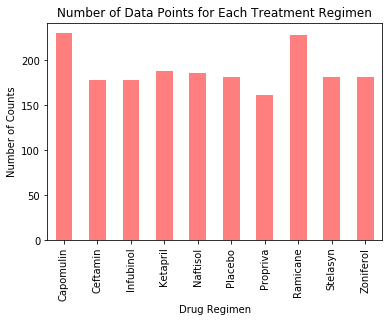

In [29]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Creating counts data frame on column "Timepoint". All columns have same count
data_count = group_regimen["Timepoint"].count()

# Creating Bar chart using pandas .plot and setting title and y-axis label
data_count.plot(kind = "bar", color = "red", alpha = .5, title = "Number of Data Points for Each Treatment Regimen").set(ylabel="Number of Counts")

# Printing results
plt.show()

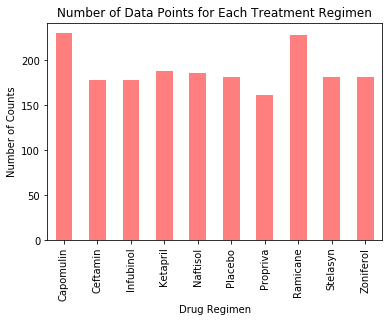

In [28]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Assigning x-axis as the index column of dataframe
x_axis = data_count.keys()

# Printing bar chart with bar with of .5
plt.bar(x_axis, data_count, width = .5, color = "red", alpha = .5)

# Rotating x-axis labels to 90 for readability
plt.xticks(rotation=90)

# Setting limits of x-axis, changing title, x and y axis labels
plt.xlim(-.5,9.5)
plt.title("Number of Data Points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Counts")

# Printing results
plt.show()

## Pie plots

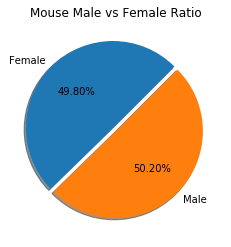

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Grouping by "Sex" for creating a new dataframe for calculations
grouped_sex = mouse_metadata.groupby("Sex")
grouped_sex = grouped_sex["Sex"].count()

# Defining explode variable for formatting
explode = [.05,0]

# Plotting pie chart using .plot
grouped_sex.plot(kind = "pie", title = "Mouse Male vs Female Ratio", autopct='%1.2f%%', explode = explode,startangle=45, shadow = True)
plt.ylabel(None)

# Printing results
plt.show()

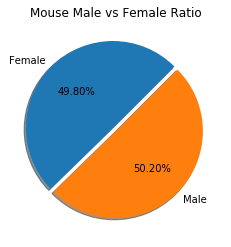

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Plotting pie chart using .pyplot
plt.pie(grouped_sex, labels=["Female","Male"], autopct='%1.2f%%', explode = explode, startangle=45, shadow = True)
plt.title("Mouse Male vs Female Ratio")

# Printing results
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Sorting merged table by Mouse ID and Timepoint in ascending order
sorted_df = merged_df.sort_values(["Mouse ID","Timepoint"])

# List of shortlisted drugs
shortlisted_drugs = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Defining "Drug Regimen" as index and collecting data of only shortlisted drugs
short_table = sorted_df.set_index("Drug Regimen")
short_table = short_table.loc[shortlisted_drugs,["Tumor Volume (mm3)","Mouse ID","Timepoint","Weight (g)"]]

# Grouping by "Drug Regimen" and "Mouse ID" and getting the last row of all the "Mouse ID"
drug_grouped_last = short_table.groupby(["Drug Regimen","Mouse ID"]).last()

# Gathering "Final Tumor Volume" data for shortlisted drugs individually
capomulin_volume = drug_grouped_last.loc["Capomulin","Tumor Volume (mm3)"]
ramicane_volume = drug_grouped_last.loc["Ramicane","Tumor Volume (mm3)"]
infobinol_volume = drug_grouped_last.loc["Infubinol","Tumor Volume (mm3)"]
ceftamin_volume = drug_grouped_last.loc["Ceftamin","Tumor Volume (mm3)"]

# Defining quartiles of regimens
cap_quartiles = capomulin_volume.quantile([.25,.5,.75])
ram_quartiles = ramicane_volume.quantile([.25,.5,.75])
inf_quartiles = infobinol_volume.quantile([.25,.5,.75])
cef_quartiles = ceftamin_volume.quantile([.25,.5,.75])

# Defining lower quartiles of regimens
cap_lowerq = cap_quartiles[.25]
ram_lowerq = ram_quartiles[.25]
inf_lowerq = inf_quartiles[.25]
cef_lowerq = cef_quartiles[.25]

# Defining upper quartiles of regimens
cap_upperq = cap_quartiles[.75]
ram_upperq = ram_quartiles[.75]
inf_upperq = inf_quartiles[.75]
cef_upperq = cef_quartiles[.75]

# Defining IQR of regimens
cap_iqr = cap_upperq - cap_lowerq
ram_iqr = ram_upperq - ram_lowerq
inf_iqr = inf_upperq - inf_lowerq
cef_iqr = cef_upperq - cef_lowerq

# Defining lower bounds for regimens
cap_lb = cap_lowerq - (1.5*cap_iqr)
ram_lb = ram_lowerq - (1.5*ram_iqr)
inf_lb = inf_lowerq - (1.5*inf_iqr)
cef_lb = cef_lowerq - (1.5*cef_iqr)

# Defining upper bounds for regimens
cap_ub = cap_upperq + (1.5*cap_iqr)
ram_ub = ram_upperq + (1.5*ram_iqr)
inf_ub = inf_upperq + (1.5*inf_iqr)
cef_ub = cef_upperq + (1.5*cef_iqr)

# Converting to dataframe for calculations
cap_data = pd.DataFrame(capomulin_volume)
ram_data = pd.DataFrame(ramicane_volume)
inf_data = pd.DataFrame(infobinol_volume)
cef_data = pd.DataFrame(ceftamin_volume)

# Outlier identification
cap_out = cap_data.loc[(cap_data["Tumor Volume (mm3)"] < cap_lb) | (cap_data["Tumor Volume (mm3)"] > cap_ub),:]
ram_out = ram_data.loc[(ram_data["Tumor Volume (mm3)"] < ram_lb) | (ram_data["Tumor Volume (mm3)"] > ram_ub),:]
inf_out = inf_data.loc[(inf_data["Tumor Volume (mm3)"] < inf_lb) | (inf_data["Tumor Volume (mm3)"] > inf_ub),:]
cef_out = cef_data.loc[(cef_data["Tumor Volume (mm3)"] < cef_lb) | (cef_data["Tumor Volume (mm3)"] > cef_ub),:]

# Printing results if outlier found and not found
if cap_out["Tumor Volume (mm3)"].empty :
    print("No outlier found in Capomulin Tumor Volume Data")
else:
    print("\033[1m"+"OUTLIERS FOUND IN CAPOMULIN TUMOR VOLUME DATA"+"\033[0m")
    display(cap_out)

if ram_out["Tumor Volume (mm3)"].empty :
    print("No outlier found in Ramicane Tumor Volume Data")
else:
    print("\033[1m"+"OUTLIERS FOUND IN RAMICANE TUMOR VOLUME DATA"+"\033[0m")
    display(ram_out)
    
if cef_out["Tumor Volume (mm3)"].empty :
    print("No outlier found in Ceftamin Tumor Volume Data")
else:
    print("\033[1m"+"OUTLIERS FOUND IN CEFTAMIN TUMOR VOLUME DATA"+"\033[0m")
    display(cef_out)
    
if inf_out["Tumor Volume (mm3)"].empty :
    print("No outlier found in Infobinol Tumor Volume Data")
else:
    print("\033[1m"+"OUTLIERS FOUND IN INFOBINOL TUMOR VOLUME DATA"+"\033[0m")
    display(inf_out)


No outlier found in Capomulin Tumor Volume Data
No outlier found in Ramicane Tumor Volume Data
No outlier found in Ceftamin Tumor Volume Data
OUTLIERS FOUND IN INFOBINOL TUMOR VOLUME DATA


,Tumor Volume (mm3)
Mouse ID,
c326,36.321346


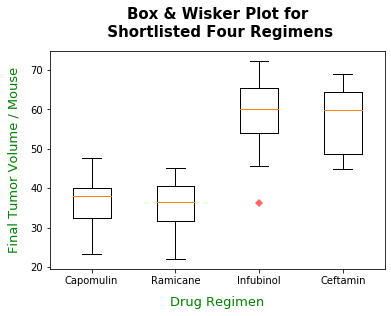

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Defining list of Data for Box plot
drug_data = [capomulin_volume,ramicane_volume,infobinol_volume,ceftamin_volume]

# Defining color and marker for outlier
red_diamond = dict(markerfacecolor='r', marker='D', markeredgewidth=False, alpha = .6)

# ploting boxplot with title, labels and changing styles
fig, ax = plt.subplots()
ax.set_title('Box & Wisker Plot for\n Shortlisted Four Regimens', pad=15, fontsize=15, fontweight="bold")
ax.boxplot(drug_data, flierprops=red_diamond,labels = shortlisted_drugs)
plt.ylabel("Final Tumor Volume / Mouse", color = "g", labelpad = 10, fontsize=13)
plt.xlabel("Drug Regimen", color = "g", labelpad=10, fontsize=13)

# Printing results
plt.show()

## Line and scatter plots

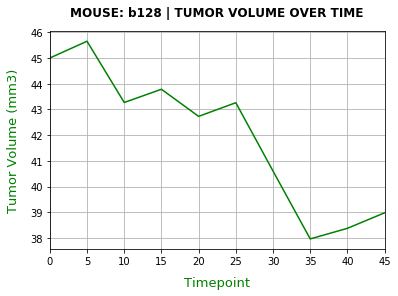

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Setting "Mouse ID" as index for loc
new_table = sorted_df.set_index("Mouse ID")

# Sorting valuse by Drug Regiment and Mouse ID
mouse_sorted = new_table.sort_values(["Drug Regimen","Mouse ID"])

# Shortlisted Mouse
mouse = ["b128"]

# Selecting mouse and fetching "Timepoint" and "Tumor Volume (mm3)" data
mouse_table = mouse_sorted.loc[mouse,["Timepoint","Tumor Volume (mm3)"]]

# Ploting graph and formating
mouse_table.plot (x = "Timepoint", y = "Tumor Volume (mm3)", kind = "line", color = "g", legend=None)
plt.title(f"MOUSE: {mouse[0]} | TUMOR VOLUME OVER TIME", pad=15, fontsize=12, fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", color = "g", labelpad = 10, fontsize=13)
plt.xlabel("Timepoint", color = "g", labelpad=10, fontsize=13)
plt.xlim(0,45)

plt.grid(True)

# Printing Results
plt.show()

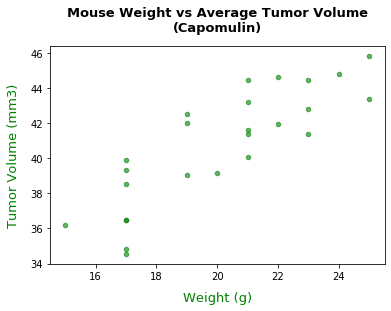

In [10]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Creating new Dataframe with grouped on "Drug Regimen" and "Mouse ID" and getting mean value
drug_grouped_mean = short_table.groupby(["Drug Regimen","Mouse ID"]).mean()

# Isolating capomulin data for "weight" of mouse and "average tumor volume" data
capomulin_short = drug_grouped_mean.loc["Capomulin",["Tumor Volume (mm3)","Weight (g)"]]

# Ploting the scatter plot with formating
capomulin_short.plot.scatter(x = "Weight (g)", y = "Tumor Volume (mm3)", c = "g", alpha = .6)
plt.title ("Mouse Weight vs Average Tumor Volume\n(Capomulin)", pad=15, fontsize=13, fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", color = "g", labelpad = 10, fontsize=13)
plt.xlabel('Weight (g)', color = "g", labelpad=10, fontsize=13)

# Printing results
plt.show()

Correlation coefficient between mouse weight and average tumor volume is 0.84


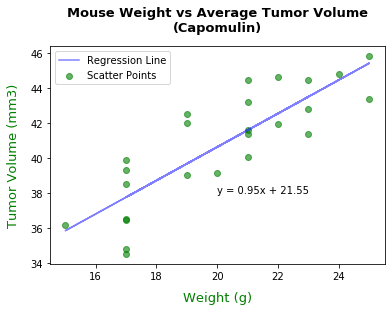

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen

# Defining columns for correlation calculations
mouse_weight = capomulin_short["Weight (g)"]
tumor_volume = capomulin_short["Tumor Volume (mm3)"]

# Calculating correlation and printing result
correlation = st.pearsonr(mouse_weight,tumor_volume)
print(f"Correlation coefficient between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Running regression on the data for plotting
x_value = mouse_weight
y_value = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_value,y_value)
regress_value = x_value*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plotting scatter plot and regression line on same graph and formating
plt.scatter(x_value,y_value, color = "g", alpha = .6, label = "Scatter Points")
plt.plot(x_value,regress_value,"b-",alpha = .5, label = "Regression Line")
plt.title ("Mouse Weight vs Average Tumor Volume\n(Capomulin)", pad=15, fontsize=13, fontweight="bold")
plt.ylabel("Tumor Volume (mm3)", color = "g", labelpad = 10, fontsize=13)
plt.xlabel('Weight (g)', color = "g", labelpad=10, fontsize=13)

# Adding line equation and legends to the plot
plt.annotate(line_eq,(20,38))
plt.legend()

# Printing results
plt.show()